# Исследование объявлений о продаже квартир

## План проекта:
### Общая информация о проекте:
 1. [Описание проекта](#1)
 2. [Описание данных](#2)
 ---
### 1. [Изучение данных](#3)
---
### 2. [Предобработка данных](#4)
- [Изучение аномалий данных](#5)
- [Изучение пропусков в данных](#5_1)
- [Изменение типов данных](#6)
- [Проверка на дубликаты, обработка дубликатов](#7)
---
### 3. [Дополнительные расчёты по данным](#7_1)
---
### 4. [Исследовательский анализ данных](#8)
- [Гистограммы распределения признаков](#9)
- [Изучение времени продажи квартиры](#10)
- [Анализ выбросов в данных](#11)
- [Зависимость цены от площади, числа комнат, удалённости от центра](#12)
- [Влияние на цену квартиры номера этажа и даты размещения объявления ](#13)
- [Анализ сегмента квартир в центре Санкт-Петербурга](#14)


### 6. [Общий вывод и рекомендации](#15)

# Описание проекта <a id='1'></a>

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры, которые позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных<a id='2'></a>

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от
- публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

# 1. Изучение данных<a id='3'></a>

In [1]:
#импортируем библиотеку pandas
import pandas as pd
pd.set_option('display.max_columns', 500)
#импортируем библиотеку numpy
import numpy as np
#отлючаем уведомления от Pandas
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

#считаем данные из предоставленного файла
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#посмотрим общую информацию
print(data.info()) 
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
#посмотрим срез значений по каждому столбцу
display(round(data.describe()))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.0,23699.0,23699.0,23699.0,14504.0,23613.0,21796.0,23699.0,21421.0,12180.0,18157.0,18180.0,18181.0,8079.0,18181.0,9110.0,20518.0
mean,10.0,6541549.0,60.0,2.0,3.0,11.0,34.0,6.0,11.0,1.0,28794.0,14191.0,1.0,491.0,1.0,518.0,181.0
std,6.0,10887013.0,36.0,1.0,1.0,7.0,22.0,5.0,6.0,1.0,12631.0,8608.0,1.0,342.0,1.0,278.0,220.0
min,0.0,12190.0,12.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,3400000.0,40.0,1.0,3.0,5.0,19.0,2.0,7.0,0.0,18585.0,9238.0,0.0,288.0,0.0,294.0,45.0
50%,9.0,4650000.0,52.0,2.0,3.0,9.0,30.0,4.0,9.0,1.0,26726.0,13098.0,0.0,455.0,1.0,502.0,95.0
75%,14.0,6800000.0,70.0,3.0,3.0,16.0,42.0,8.0,12.0,2.0,37273.0,16293.0,1.0,612.0,1.0,729.0,232.0
max,50.0,763000000.0,900.0,19.0,100.0,60.0,410.0,33.0,112.0,5.0,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0


In [3]:
#посмотрим первые строки таблицы
display(data.head()) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

В предоставленном датафрейме 23699 строк и 22 колонки. Названия столбцов однотипные и отражают содержание.

Встречается следующие типы данных: object, bool, float64, int64.

Имеются пропуски в столбцах:
- ceiling_height 
- floors_total 
- living_area  
- is_apartment
- kitchen_area 
- balcony
- locality_name 
- airports_nearest
- cityCenters_nearest 
- parks_around3000  
- parks_nearest
- ponds_around3000 
- ponds_nearest 
- days_exposition

Также можно заметить нереалистичность некоторых данных (ceiling_height max = 100.0, ceiling_height min = 1, rooms min = 0 и другие).

# 2. Предобработка данных <a id='4'></a>

In [4]:
#создадим копию датафрейма, чтобы при необходимости можно было вернуться к исходным данным
df = data

## Изучение аномалий данных <a id='5'></a>

Сразу уберем из таблицы аномалии и пропуски, которые будет достаточно сложно заполнить медианными значениями.

- строки без указания общего числа этажей:
Опять же, либо техническая ошибка, либо ошибка при заполнении данных. Таких строк немного, поэтому просто удалим их, чтобы не выдумывать значения на пустом месте.
- строки без указания названия населенного пункта:
Столбец с категориальными данными. Подходящих значений для заполнения пропусков нет. Отсутствие данных в этом столбце повлияет на заполнение пропусков в остальных столбцах, поэтому избавимся от них (таких строк немного).

In [5]:
#посчитаем, сколько строк являются незаполненными либо неверно заполненными в интересующих столбцах
display(df[df['floors_total'].isnull()])
display(df[df['locality_name'].isnull()])
display(df[df['rooms']==0])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,False,False,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,NaN,False,False,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,False,False,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,False,False,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,NaN,False,False,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,False,False,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,False,False,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,False,False,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,False,False,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,NaN,False,False,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.00,4,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.00,8,NaN,False,True,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Итого: 86 строк без указания общего количества этажей и 49 строк без указания названия населенного пункта. Отфильтруем датафрейм, убрав эти строки (возможно они где-то перекликаются по отсутствующим значениям). Отфильтруем датафрейм, убрав эти строки.

In [6]:
#отфильтруем датафрейм, исключив строки с NaN в указанных столбцах
df = df.dropna(subset=['locality_name']).reset_index(drop=True)
df = df.dropna(subset=['floors_total']).reset_index(drop=True)

Для строк с нулевым числом комнат - попробуем логическую замену: если недвижимость является студией или имеет открытую планировку, то заменим 0 на 1. Для этого сначала посмотрим уникальные значения числа комнат для квартир-студий и квартир с открытой планировкой.

In [7]:
# уникальные значения числа комнат для квартир-студий
df_studio = df.query('studio == True')
display(df_studio.rooms.value_counts())

0    135
1     11
Name: rooms, dtype: int64

In [8]:
#  уникальные значения числа комнат для квартир с открытой планировкой
df_open_plan = df.query('open_plan == True')
display(df_open_plan.rooms.value_counts())

0    59
1     3
3     2
5     1
4     1
2     1
Name: rooms, dtype: int64

Можно заметить, что нулевые значения числа комнат преобладают для объявлений квартир-студий и квартир с открытой планировкой. Оставим эти значений без изменений, поскольку не ясно, что имели ввиду клиенты при заполнении объявлений.

In [9]:
#убедимся,что в столбцах с названиями городов и числом этажей больше нет пропущенных значений
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null float64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 12090 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around300

In [10]:
display(df.studio.value_counts())

False    23419
True       146
Name: studio, dtype: int64

По итогу: удалили строки с пропущенными значениями в столбцах locality_name  и floors_total. Нулевые значений в столбце rooms оставляем без изменений.

## Изучение пропусков в данных <a id='5_1'></a>

После удаления строк с труднозаполняемыми пропусками, пропущенные значения остались в 12 столбцах.

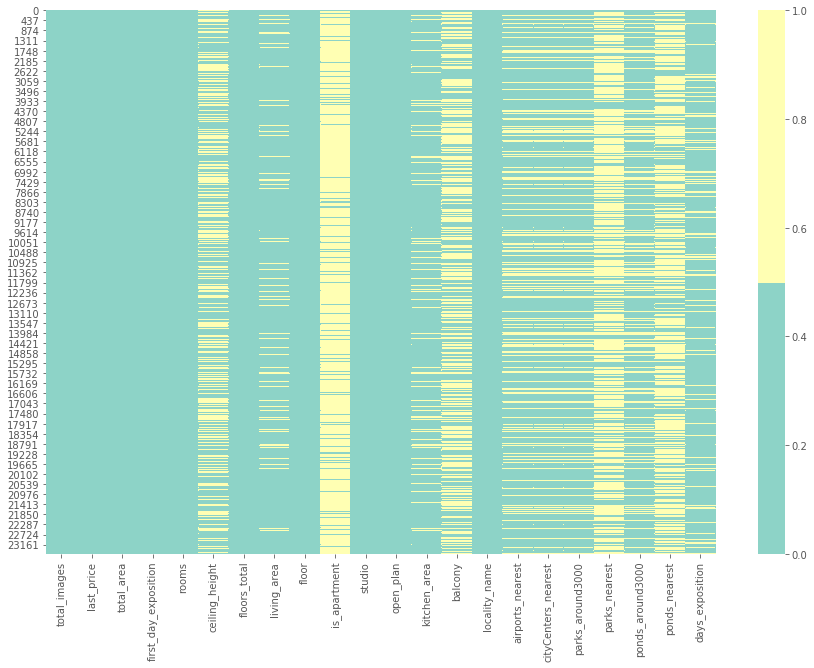

In [11]:
#посмотрим как в таблице распределены пропущенные значения (желтый цвет)
cmap = sns.mpl_palette("Set3", 2)
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), cmap= cmap)

Пропуски присутствуют в 12 столбцах. Даже визуально есть строки, в которых заполнено менее 50% столбцов. 

Наибольшее количество пропущенных значений наблюдается в столбце 'is_apartment'. Много пропусков в столбцах с информацией о парках и прудах рядом, количестве балконов и высоте потолков.

Начнем работу с пропусками. Для начала разберемся с информацией в столбце 'locality_name'.

In [12]:
#посмотрим уникальные значения столбца 'locality_name'
print(df['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [13]:
#проверим количество уникальных значений столбца 'locality_name'
print(df['locality_name'].value_counts().count())
print()
#посмотрим выборочные значения для столбца 'locality_name'
print(df['locality_name'][df['locality_name'].str.contains('Мурино')].value_counts())
print(df['locality_name'][df['locality_name'].str.contains('Рябово')].value_counts())
print(df['locality_name'][df['locality_name'].str.contains('Мга')].value_counts())
print(df['locality_name'][df['locality_name'].str.contains('Токсово')].value_counts())

364

посёлок Мурино    520
Мурино             34
поселок Мурино     32
Name: locality_name, dtype: int64
поселок Рябово                    2
поселок городского типа Рябово    1
посёлок городского типа Рябово    1
Name: locality_name, dtype: int64
городской посёлок Мга          27
посёлок городского типа Мга     6
Name: locality_name, dtype: int64
посёлок городского типа Токсово    16
поселок городского типа Токсово     3
Name: locality_name, dtype: int64


В столбце 'locality_name' отсутствуют единые названия для населенных пунктов:
- посёлок/поселок - некоторые пользователи используют букву ё.
- не все пользователи могут точно определить к какому типу поселения относится населенный пункт (город, поселок, ПГТ он же городской поселок, деревня и прочее)

Приведем сходные названия к единому виду, иначе медианы по другим данным строиться для каждого названия отдельно. Что сделаем:
- заменим "посёлок" на "поселок"
- заменим "городской поселок" на "поселок городского типа"

Сразу соберем уникальные значения в словарь, который понадобится позже при заполнении пропусков в других столбцах.

In [14]:
#посмотрим первые стоки датафрейма до удаления лишних слов
print(df['locality_name'].head(10))
print()
df['locality_name'] = df['locality_name'].str.replace(r'\посёлок\b', 'поселок')
df['locality_name'] = df['locality_name'].str.replace(r'\городской поселок\b', 'поселок городского типа')

#проверим количество уникальных значений столбца 'locality_name'
print(df['locality_name'].value_counts().count())
print()
#соберем уникальные значения 'locality_name' в словарь 
locality_name_dict = df['locality_name']
#удалим дубликаты строк
locality_name_dict = locality_name_dict.drop_duplicates().reset_index(drop=True)
print(locality_name_dict.sort_values())

0              Санкт-Петербург
1               посёлок Шушары
2              Санкт-Петербург
3              Санкт-Петербург
4              Санкт-Петербург
5    городской посёлок Янино-1
6            посёлок Парголово
7              Санкт-Петербург
8               посёлок Мурино
9              Санкт-Петербург
Name: locality_name, dtype: object

323

73             Бокситогорск
61                 Волосово
28                   Волхов
27               Всеволожск
15                   Выборг
               ...         
46            село Путилово
211        село Рождествено
189    село Русско-Высоцкое
191      село Старая Ладога
275                село Шум
Name: locality_name, Length: 323, dtype: object


Таким образом, из столбца 'locality_name'удалены все  слова, вызывавшие дублирование одних и тех же названий.

Пропуски в столбцах 'parks_around3000','ponds_around3000', 'parks_nearest',  'ponds_nearest', 'airports_nearest' оставим без изменений, поскольку информация из этих столбцов в дальнейшем не пригодится.

Для столбца 'cityCenters_nearest' пропуски также оставим незаполненными, поскольку в дальнейшем потребуется отфильтровать объявления из центра Санкт-Петербурга, где заполнение медианным расстоянием может сгладить границу между центром и окраинами.

In [15]:
# посмотрим, как тепер распределены по столбцам пропущенные значения
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null float64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 12090 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around300

Наибольшее число пропусков (кроме тех столбцов, которые мы уже отсекли) в столбцах с информацией по балконам и апартаментам. Будем считать,что владельцы апартаментов и балконов ставили соответствующие отметки об их наличии, поскольку довольно сложно упустить при продаже недвижимости оба этих фактора. Поэтому пропуски в данных столбцах приравняем к их отсутствию. 

Заполним пропуски в столбце 'balcony' нулями, в столбце 'is_apartment' проставим для пропущенных значений 'False'.

In [16]:
#заполняем пропуски в столбце 'balcony' нулями
df['balcony'] = df['balcony'].fillna(0)
#заполняем пропуски в столбце 'is_apartment' значением 'False'
df['is_apartment'] = df['is_apartment'].fillna('False')

In [17]:
#проверим, что NaN были заполнены
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null float64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around30

В столбцах с информацией по высоте потолков, жилой площади, площади кухни и количестве дней размещения объявления пропуски оставим незаполненным. Заполнение медианами приведет к искажению последущих результатов.

In [18]:
#проверим размер таблицы после удаления всех данных и заполнения пропусков
print(df.shape)

(23565, 22)


## Изменение типа данных <a id='6'></a>

In [19]:
#обратимся к информации о типах данных в каждой колонке таблицы
print(df.dtypes) 
display(round(df.describe(),1))

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.0,23565.0,23565.0,23565.0,14481.0,23565.0,21700.0,23565.0,21343.0,23565.0,18041.0,18064.0,18065.0,8030.0,18065.0,9036.0,20394.0
mean,9.9,6540058.3,60.3,2.1,2.8,10.7,34.5,5.9,10.6,0.6,28797.1,14192.7,0.6,490.6,0.8,518.3,180.7
std,5.7,10910934.7,35.7,1.1,1.3,6.6,22.0,4.9,5.9,1.0,12632.5,8613.3,0.8,341.6,0.9,278.0,219.7
min,0.0,12190.0,12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,3400000.0,40.0,1.0,2.5,5.0,18.6,2.0,7.0,0.0,18565.0,9238.0,0.0,288.0,0.0,293.0,45.0
50%,9.0,4646000.0,52.0,2.0,2.6,9.0,30.0,4.0,9.1,0.0,26757.0,13096.5,0.0,455.0,1.0,503.0,95.0
75%,14.0,6790000.0,69.7,3.0,2.8,16.0,42.3,8.0,12.0,1.0,37273.0,16285.0,1.0,612.0,1.0,730.0,231.0
max,50.0,763000000.0,900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0


In [20]:
df['floors_total'] = pd.to_numeric(df['floors_total']).astype('int')

Вещественный тип данных (float64), который можно без потери знаков после запятой заменить на целочисленный (int), содержится в столбцах 'last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000'.

Столбец 'first_day_exposition' необходимо перевести в формат даты.

Столбец 'is_apartment' сейчас является строкой, однако по факту каждая строка является булевым выражением, поэтому приведем этот столбец к булеву типу данных.

In [21]:
#заменим в указанных выше столбцах вещественный тип данных на целочисленных
df['last_price'] = pd.to_numeric(df['last_price']).astype('int')
df['floors_total'] = pd.to_numeric(df['floors_total']).astype('int')
df['balcony'] = pd.to_numeric(df['balcony']).astype('int')

#заменим строковый тип данных на булево выражение
df['is_apartment'] = df['is_apartment'].map(lambda x: True if pd.notnull(x) else False)

#заменим строковый тип данных на дату
df['first_day_exposition']= pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

#проверим, произшло ли изменение типов данных
print(df.dtypes)

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object


## Проверка на дубликаты, обработка дубликатов <a id='7'></a>

In [22]:
#посмотрим размер таблицы до удалению строк дубликатов
print(df.shape)

(23565, 22)


In [23]:
#посчитаем количество полных дубликатов строк
print(df.duplicated().sum())

0


In [24]:
#удалим полные дубликаты строк,за исключением первого вхождения
df = df.drop_duplicates(keep='first').reset_index(drop=True)
#проверим размер таблицы после удаления дубликатов строк
print(df.shape)

(23565, 22)


In [25]:
#проверим, что полных дубликатов строк в таблице нет
print(df.duplicated().sum())

0


В данных отсутствуют полные дубликаты строк.

### Вывод

Предобработка данных прошла следующие этапы:
- удаление строк с пропусками, для которых не получится подобрать замещающие значения и строк с неверно заполненными данными
- заполнение пропусков
- преобразование типов данных
- удаление дубликатов строк

Для балконов и апартаментов пропуски были приравнены к отсутствию таковых признаков у продаваемой недвижимости.

Пропуски в столбцах с картографическими данными (близость до центра и аэропорта, пруды и парки рядом) практически совпали, поэтому предположим, что они были вызваны техническим сбоем при определении координат расположения квартиры.
Остальные пропуски могут быть вызваны:
1. невнимательностью людей при заполнении объявления;
2. технической ошибкой при заполнении или обработке (не сохранились данные, не подошел формат заполнения и т.д.)
3. нежеланием заполняющих разглашать какие-то данные о недвижимости.

# 3. Дополнительные расчёты по данным <a id='7_1'></a>

Для дальшейнего анализа данных, необходимо добавить в датасет следующие данные:
1. цену квадратного метра;
2. день недели, месяц и год публикации объявления;
3. соотношение жилой и общей площади;
4. соотношение площади кухни и общей.

In [26]:
#добавляем в таблицу цену квадратного метра
df['price_per_square_meter'] = round(df['last_price'] / df['total_area'],2) 

In [27]:
#добавляем в таблицу день недели, месяц и год публикации объявления
df['weekday'] = df['first_day_exposition'].dt.weekday +1
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [28]:
#напишем функцию, которая разделит этажи на категории
def floor_type(row):
        if  row['floor'] == 1:
            return '1'
        elif row['floor'] == row['floors_total'] !=1:
            return '3'
        else:
            return '2'
        
#добавляем в таблицуданные о категории этажа  
df['floor_type'] = df.apply(floor_type, axis = 1)

In [29]:
#добавим в таблицу столбец, отражающий соотношение жилой и общей площади
df['ratio_living_area'] = round(df['living_area'] / df['total_area'],2)
#добавим в таблицу столбец, отражающий соотношение кухни и общей площади
df['ratio_kitchen_area'] = round(df['kitchen_area'] / df['total_area'],2)

In [30]:
#Посмотрим, что все данные добавились
display(df.sample(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_type,ratio_living_area,ratio_kitchen_area
20052,8,2600000,24.0,2018-03-15,1,2.5,10,13.0,3,True,False,False,NaN,2,Санкт-Петербург,30067.0,6262.0,0.0,NaN,1.0,332.0,26.0,108333.33,4,3,2018,2,0.54,NaN
18187,18,10600000,67.4,2018-03-23,2,NaN,25,33.3,6,True,False,False,9.5,0,Санкт-Петербург,38924.0,10610.0,1.0,255.0,1.0,294.0,244.0,157270.03,5,3,2018,2,0.49,0.14
14154,10,6900000,55.0,2018-01-12,2,3.0,4,NaN,2,True,False,False,NaN,0,Санкт-Петербург,38147.0,8158.0,0.0,NaN,3.0,317.0,60.0,125454.55,5,1,2018,2,NaN,NaN
21756,16,4250000,106.2,2016-02-25,3,2.5,4,64.7,4,True,False,False,10.0,0,Шлиссельбург,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40018.83,4,2,2016,3,0.61,0.09
20362,8,3564000,53.0,2018-10-17,2,NaN,12,28.0,8,True,False,False,12.0,0,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,45.0,67245.28,3,10,2018,2,0.53,0.23


# 4. Исследовательский анализ данных <a id='8'></a>

## Гистограммы распределения признаков <a id='9'></a>

Построим гистограммы для следующих параментров недвижимости: площадь, цена, число комнат, высота потолков, цена за квадратный метр. 

total_area


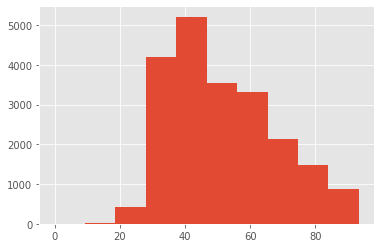

last_price


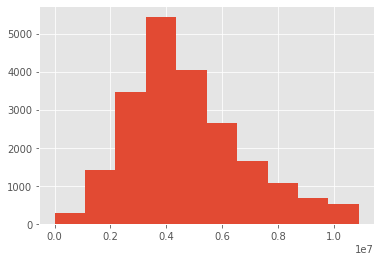

price_per_square_meter


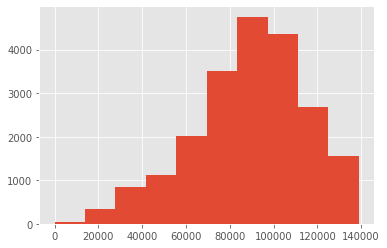

rooms


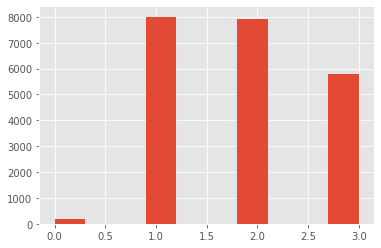

ceiling_height


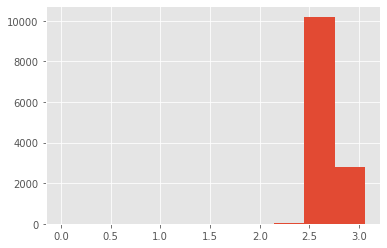

In [31]:
#создадим отдельный датафрейм из столбцов, для которых необходимо построить гистограмму
df_hist = df[['total_area','last_price', 'price_per_square_meter','rooms', 'ceiling_height']]

#построим гистограммы
for element in df_hist.columns.values:
    df_hist[element].hist(bins=10, range=(0,df_hist[element].quantile(0.9)))
    print(df_hist[element].name)
    plt.show()



На гистограммах видно, что:
1. Площадь квартир находится в диапазоне от 10 до 100 квадратных метров. Наиболее часто встречаются квартиры с площадью 40-50 квадратных метров.
2. Цена за квадратный метр колеблется в пределах 0-140 тысяч рублей за квадратный метр. Распределение цен внешне похоже на нормальное.
3. Чем выше цена квартиры, тем меньше вариантов выбора у покупателей.
4. Объявления с одной и двумя комнатами встречаются чаще, чем остальные.
5. Всота потолков чаще всего составляет 2,4-2,7 метра. Чем выше потолок в квартире, тем меньше выбор вариантов.

## Изучение времени продажи квартиры <a id='10'></a>

Среднее время продажи квартиры составляет: 180.74
Медианное время продажи квартиры составляет: 95.0


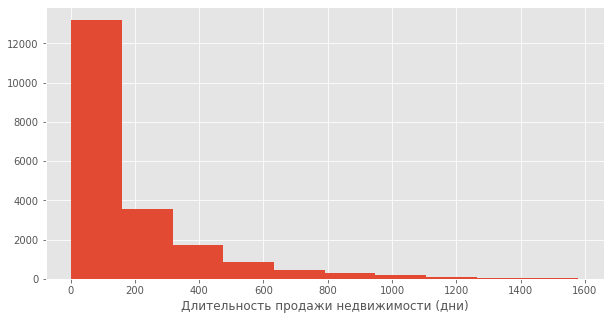

In [32]:
#построим диаграмму
df['days_exposition'].hist(bins=10, figsize=(10,5)).set_xlabel('Длительность продажи недвижимости (дни)')
print('Среднее время продажи квартиры составляет:' ,round(df['days_exposition'].mean(),2))
print('Медианное время продажи квартиры составляет:',df['days_exposition'].median())

На гистограмме видно, что большинство квартир продаются примерно до 180 дней. При этом медианное время продажи значительно больше среднего - это означает, что есть квартиры, коорые продаются очень быстро.

Tаким образом, быстрой продажей квартиры считаются объявления, провисевшие на сайте менее 95 дней. Если же продажа квартиры затянулась на более чем 300 дней, то можно считать ее долгой.

## Анализ выбросов в данных <a id='11'></a>

Посмотрим  как выглядят диаграммы разброса для столбцов датасета.

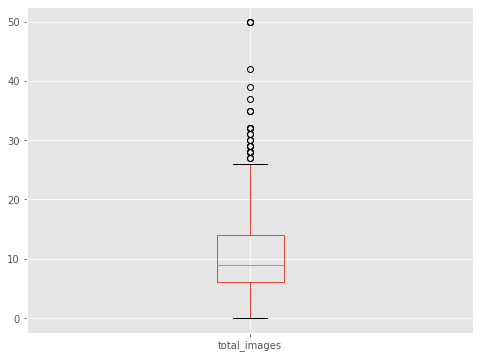

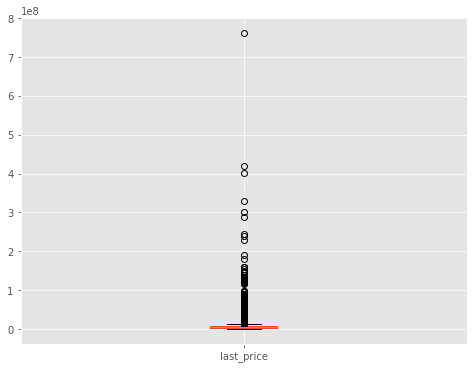

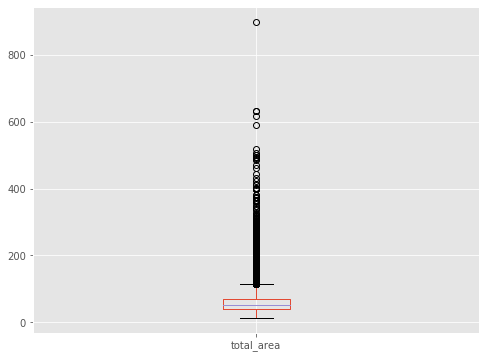

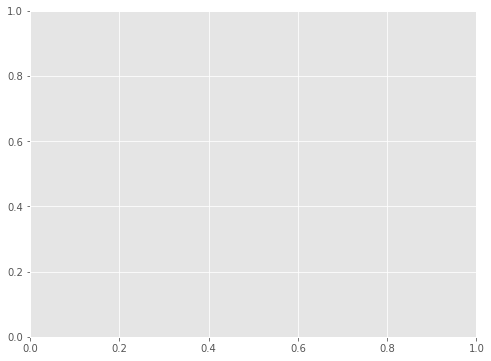

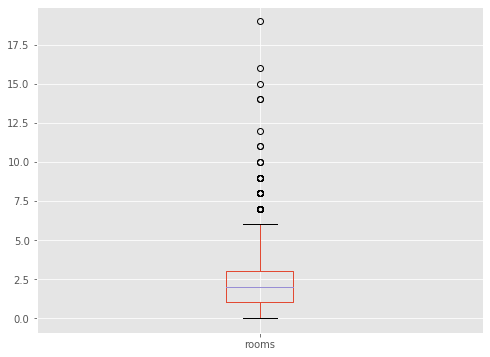

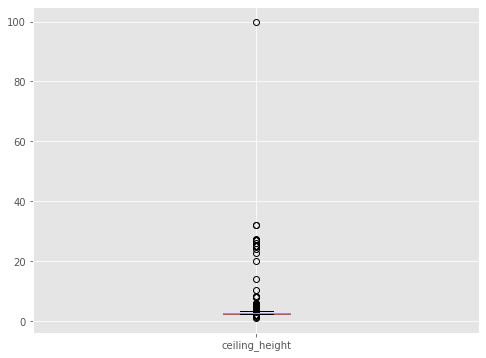

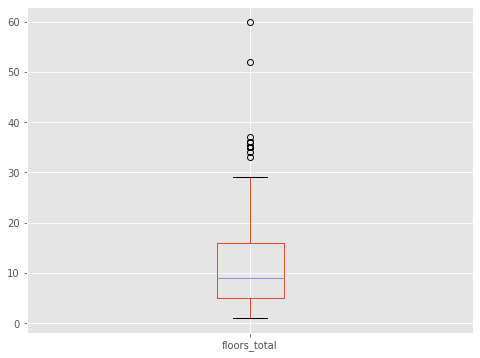

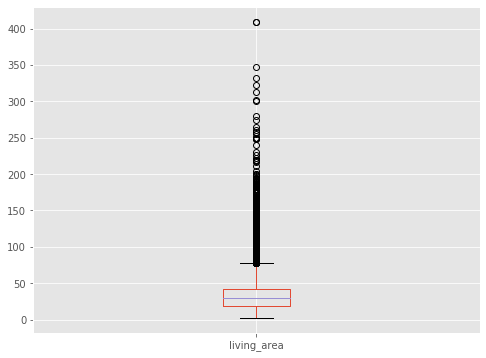

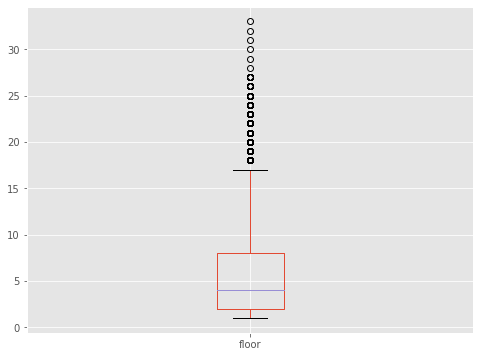

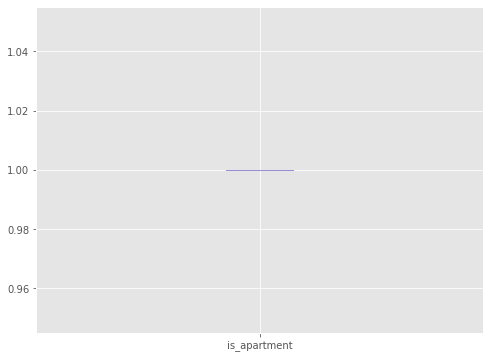

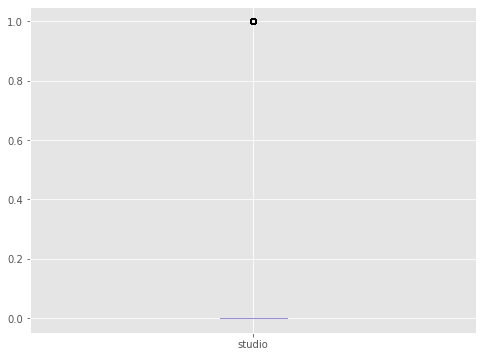

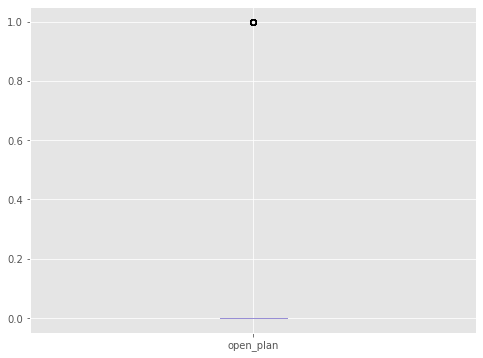

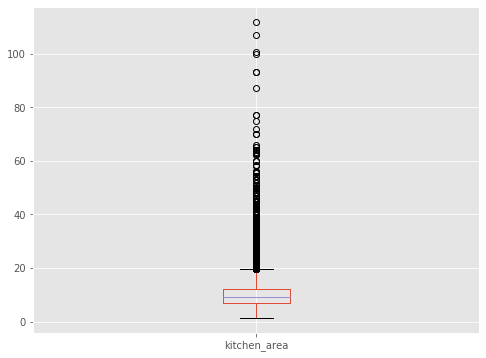

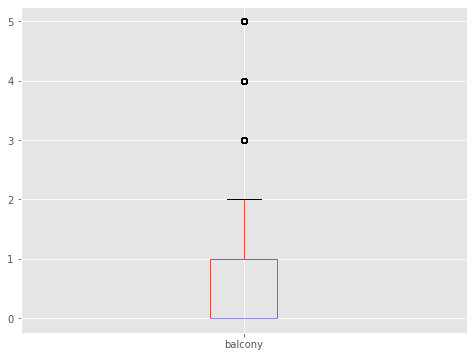

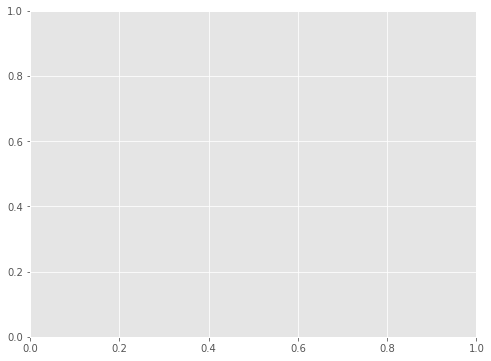

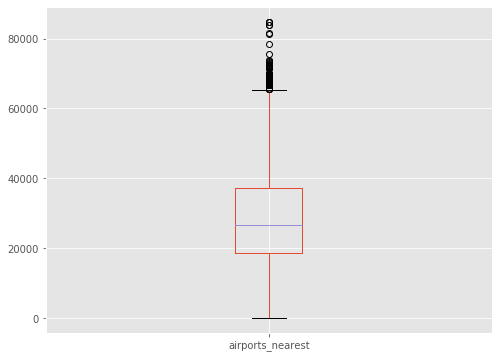

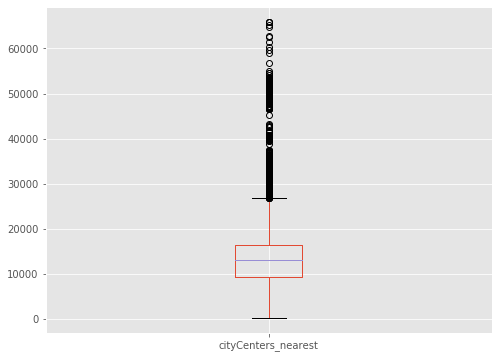

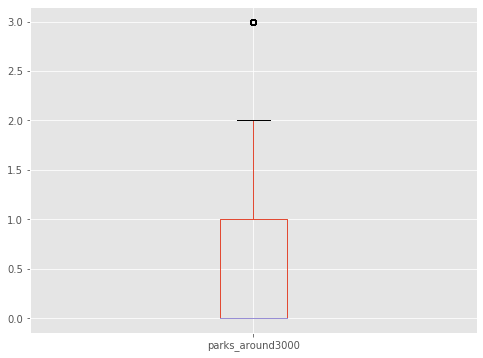

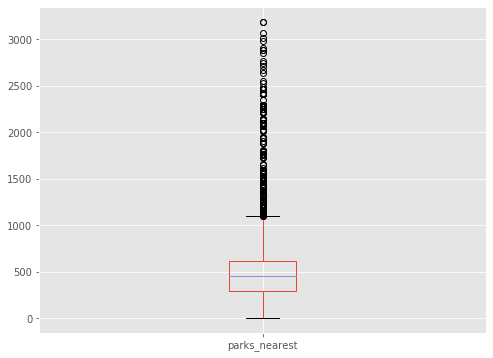

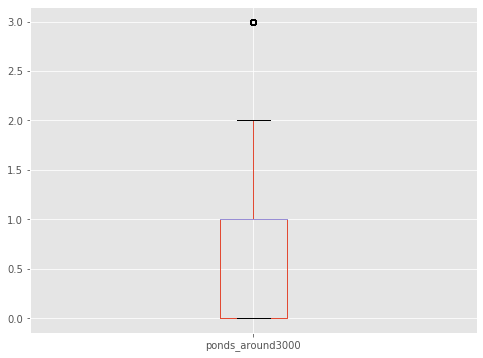

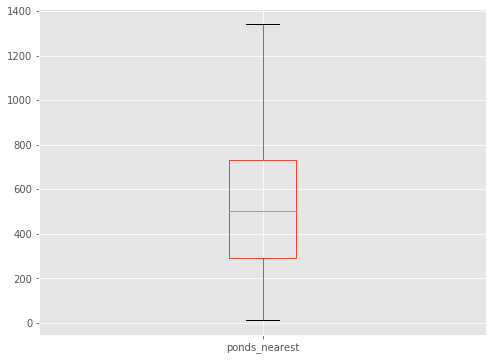

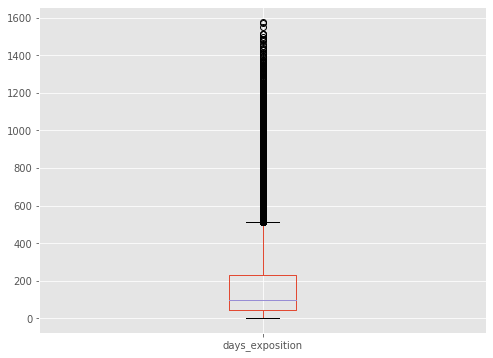

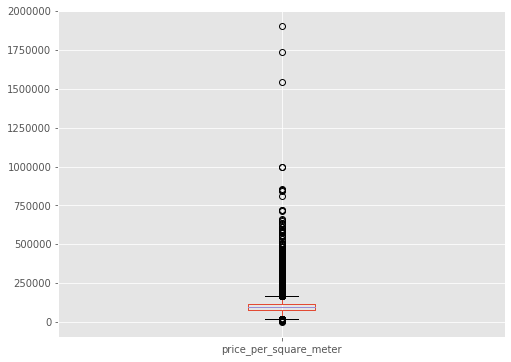

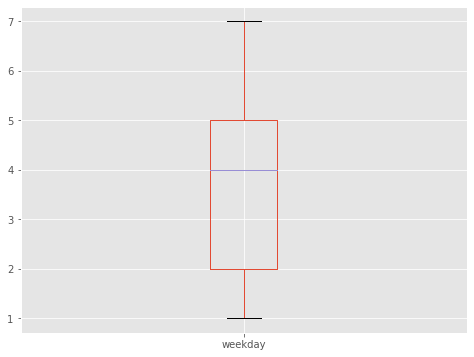

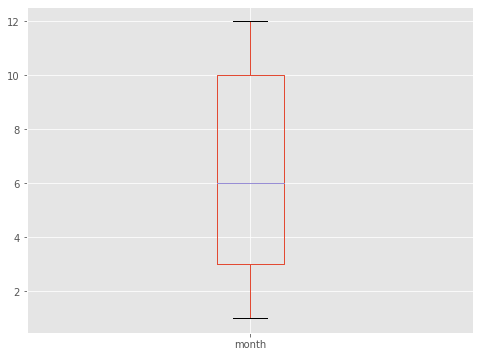

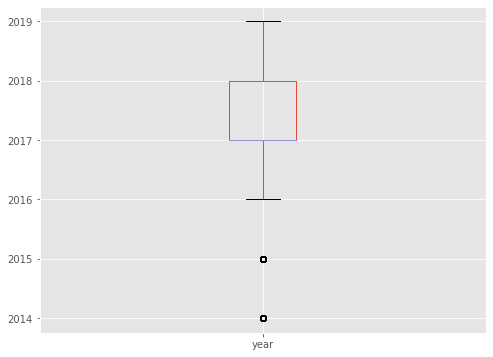

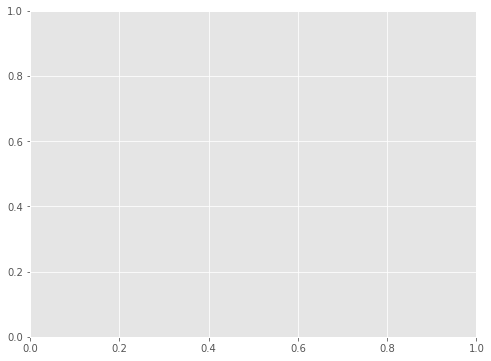

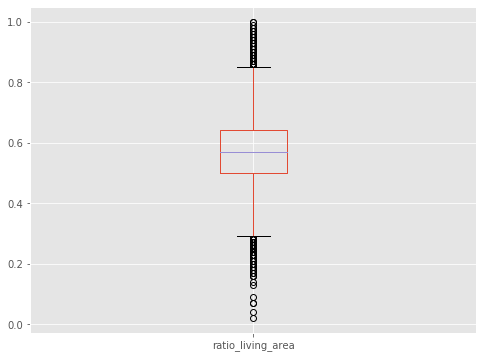

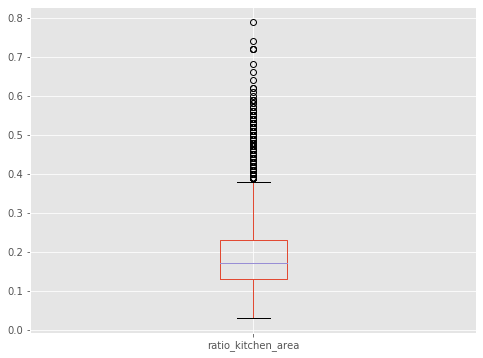

In [33]:
for column in df:
    try:
        plt.rcParams['figure.figsize']=(8,6)
        plt.figure()
        df.boxplot([column])
    except:
        print()

На диаграммах размаха можно увидеть, что у некоторых столбцов очень длинные "усы" слишком маленьких или слишком больших значений параметров. Избавимся от этих значений для столбцов, в которых это возможно и которые нужны для исследования данных.

In [34]:
#создадим копию датафрейма, где будем работать с выбросами
df_normalize = df

#посмотрим на краткие срезы столбцов до удаления выбросов
display(df_normalize.describe().astype(int))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,ratio_living_area,ratio_kitchen_area
count,23565,23565,23565,23565,14481,23565,21700,23565,21343,23565,18041,18064,18065,8030,18065,9036,20394,23565,23565,23565,23565,21700,21343
mean,9,6540058,60,2,2,10,34,5,10,0,28797,14192,0,490,0,518,180,99405,3,6,2017,0,0
std,5,10910934,35,1,1,6,22,4,5,0,12632,8613,0,341,0,278,219,50389,1,3,1,0,0
min,0,12190,12,0,1,1,2,1,1,0,0,181,0,1,0,13,1,111,1,1,2014,0,0
25%,6,3400000,40,1,2,5,18,2,7,0,18565,9238,0,288,0,293,45,76566,2,3,2017,0,0
50%,9,4646000,52,2,2,9,30,4,9,0,26757,13096,0,455,1,503,95,95000,4,6,2017,0,0
75%,14,6790000,69,3,2,16,42,8,12,1,37273,16285,1,612,1,730,231,114213,5,10,2018,0,0
max,50,763000000,900,19,100,60,409,33,112,5,84869,65968,3,3190,3,1344,1580,1907500,7,12,2019,1,0


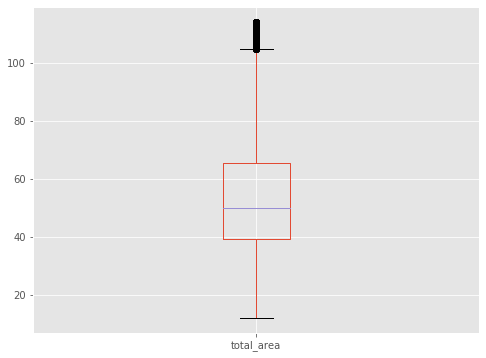

In [35]:
#посчитаем пороги для столбца 'total_area'
Q_1 =  df['total_area'].quantile(0.25)
Q_3 = df['total_area'].quantile(0.75)
IQR = Q_3 - Q_1
Q1 = Q_1 - 1.5*IQR
Q3=Q_3 + 1.5*IQR
#отфильтруем датафрейм
df_normalize = df_normalize.query('(total_area > @Q1) and (total_area < @Q3)')

#проверим как теперь выглядит диаграмма размаха
plt.rcParams['figure.figsize']=(8,6)
plt.figure()
df_normalize.boxplot(['total_area'])

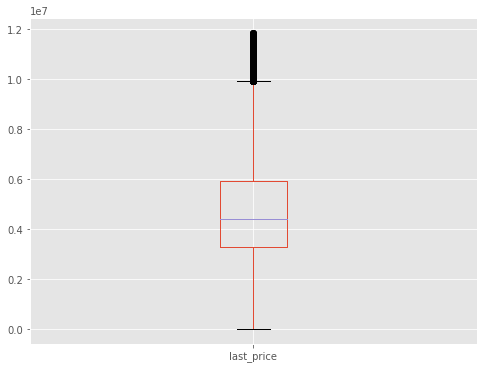

In [36]:
#посчитаем пороги для столбца 'last_price'
Q_1 =  df['last_price'].quantile(0.25)
Q_3 = df['last_price'].quantile(0.75)
IQR = Q_3 - Q_1
Q1 = Q_1 - 1.5*IQR
Q3=Q_3 + 1.5*IQR
#отфильтруем датафрейм
df_normalize = df_normalize.query('(last_price > @Q1) and (last_price< @Q3)')

#проверим как теперь выглядит диаграмма размаха
plt.rcParams['figure.figsize']=(8,6)
plt.figure()
df_normalize.boxplot(['last_price'])

In [37]:
#посмотрим срез значений по каждому столбцу после нормализации
display(round(df_normalize.describe()))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,ratio_living_area,ratio_kitchen_area
count,21338.0,21338.0,21338.0,21338.0,12952.0,21338.0,19701.0,21338.0,19330.0,21338.0,15882.0,15893.0,15894.0,6592.0,15894.0,7621.0,18732.0,21338.0,21338.0,21338.0,21338.0,19701.0,19330.0
mean,10.0,4799778.0,53.0,2.0,3.0,11.0,30.0,6.0,10.0,1.0,28920.0,15014.0,1.0,488.0,1.0,532.0,172.0,92032.0,4.0,6.0,2017.0,1.0,0.0
std,6.0,2178442.0,18.0,1.0,1.0,7.0,13.0,5.0,4.0,1.0,13002.0,8513.0,1.0,327.0,1.0,278.0,210.0,29562.0,2.0,3.0,1.0,0.0,0.0
min,0.0,12190.0,12.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,208.0,0.0,1.0,0.0,16.0,1.0,112.0,1.0,1.0,2014.0,0.0,0.0
25%,6.0,3300000.0,39.0,1.0,2.0,5.0,18.0,2.0,7.0,0.0,18026.0,10659.0,0.0,289.0,0.0,315.0,43.0,74667.0,2.0,3.0,2017.0,0.0,0.0
50%,9.0,4400000.0,49.0,2.0,3.0,9.0,29.0,4.0,9.0,0.0,27122.0,13649.0,0.0,456.0,0.0,522.0,91.0,92727.0,4.0,6.0,2017.0,1.0,0.0
75%,14.0,5950000.0,63.0,3.0,3.0,16.0,39.0,8.0,11.0,1.0,37637.0,16704.0,1.0,613.0,1.0,741.0,217.0,109375.0,5.0,10.0,2018.0,1.0,0.0
max,50.0,11866860.0,114.0,6.0,32.0,60.0,94.0,33.0,50.0,5.0,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0,312240.0,7.0,12.0,2019.0,1.0,1.0


In [38]:
### Код ревьювера ###

len(df_normalize) / 23699

0.900375543271868

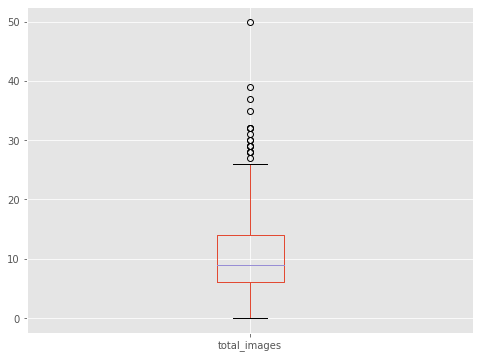

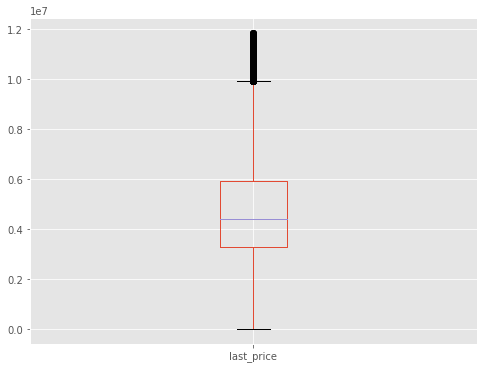

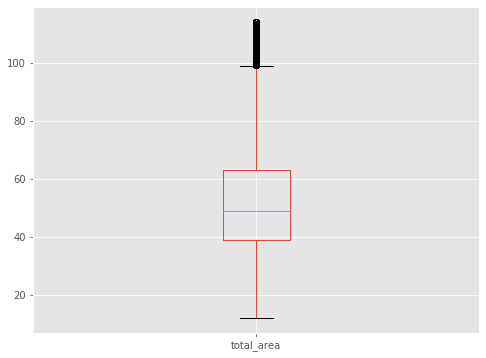

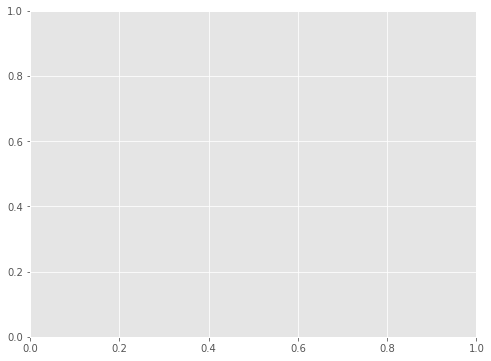

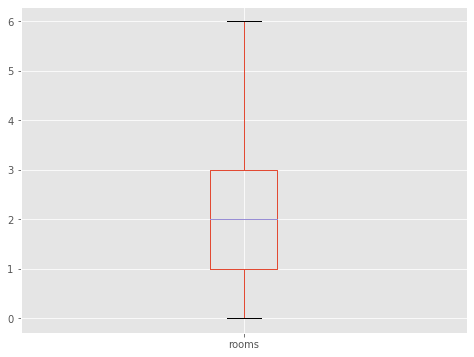

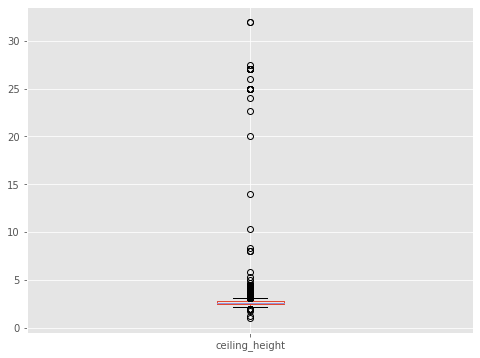

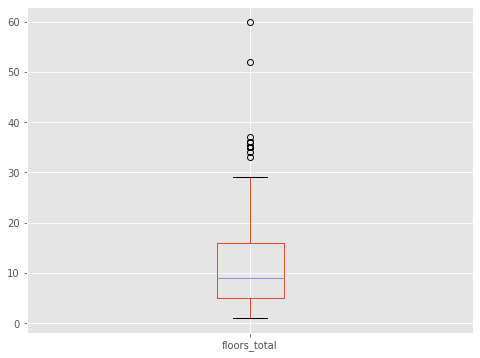

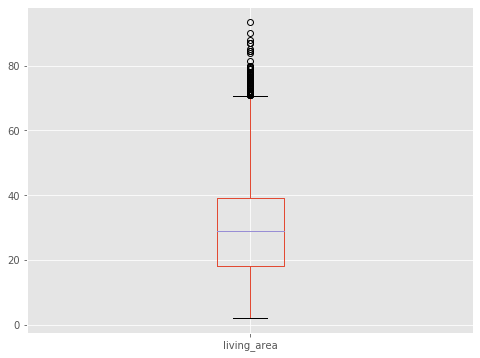

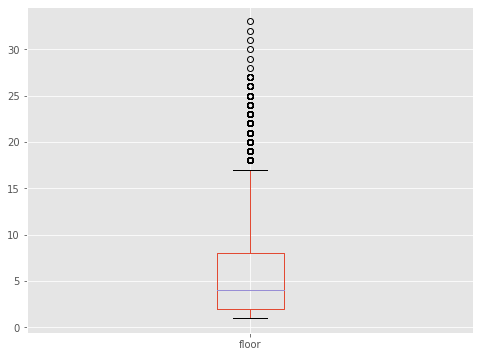

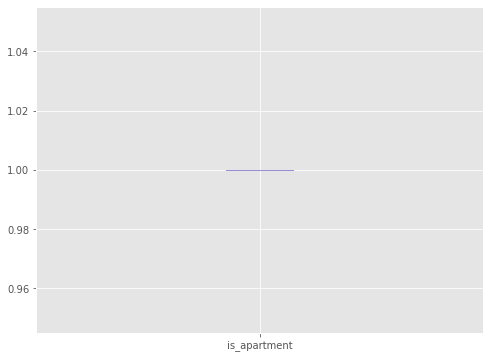

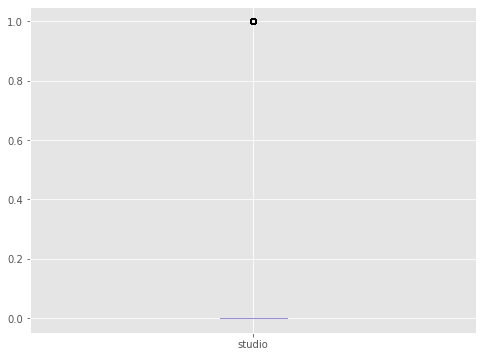

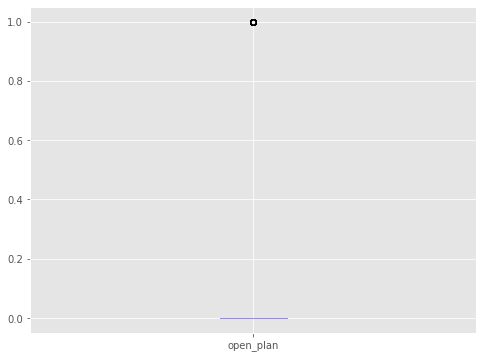

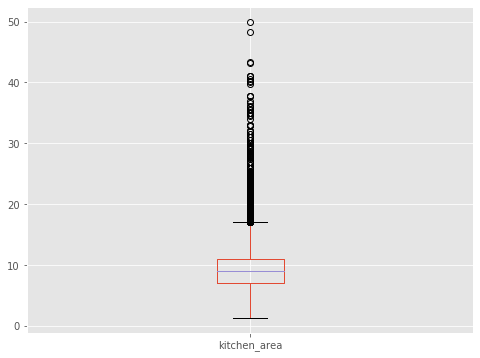

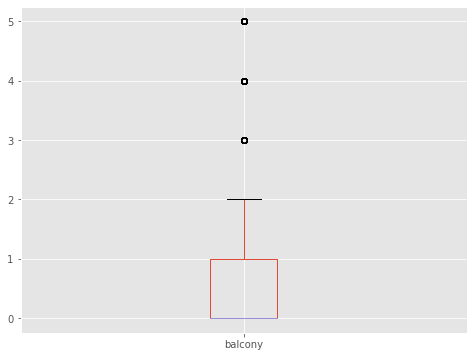

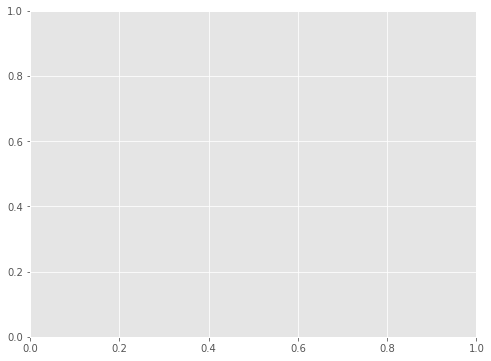

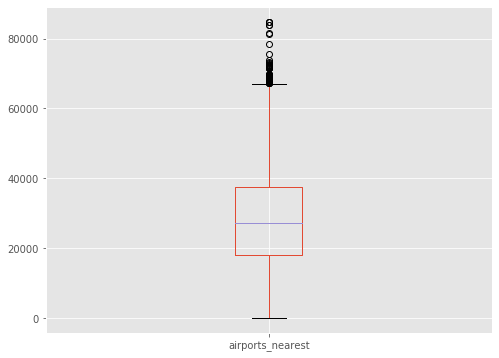

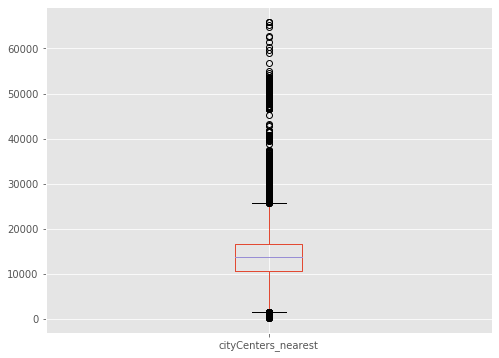

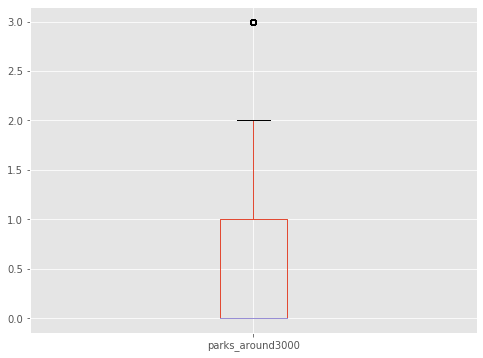

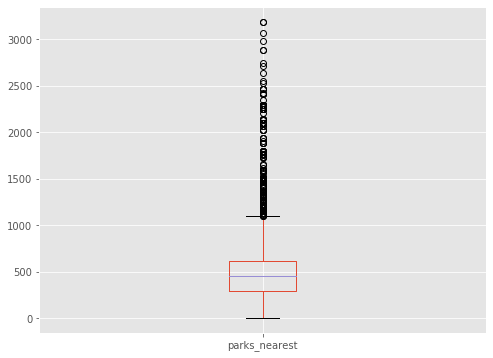

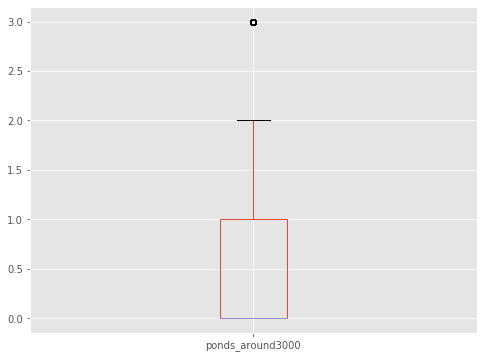

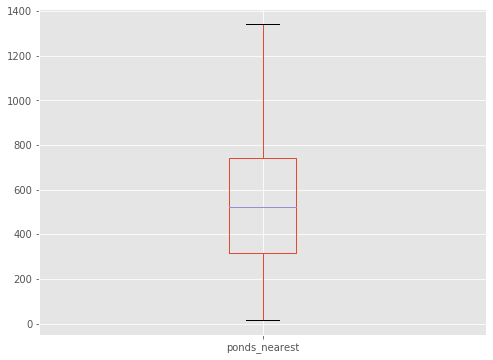

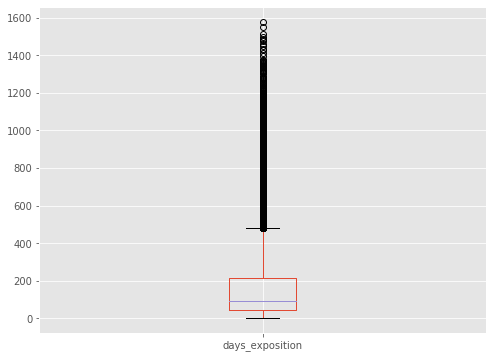

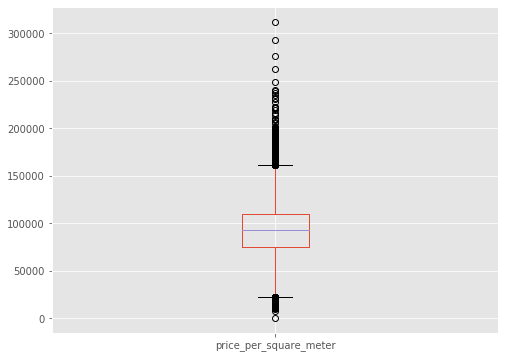

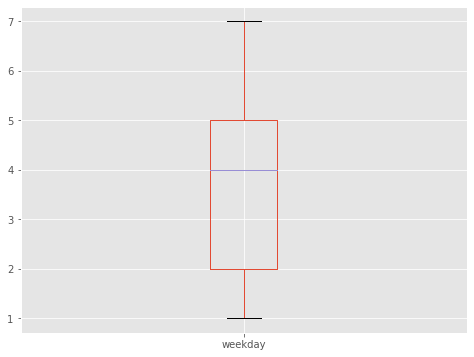

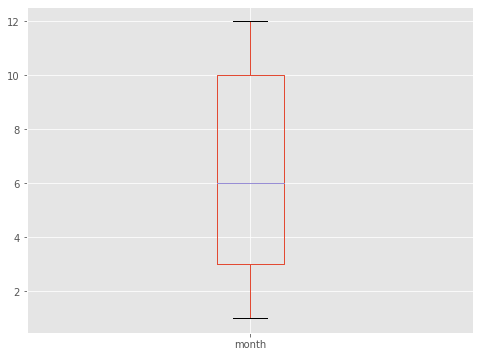

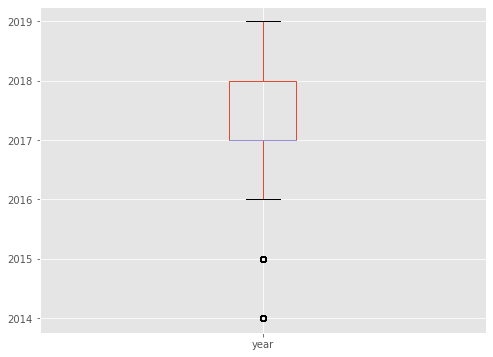

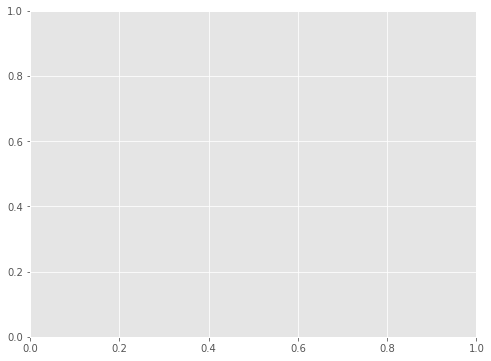

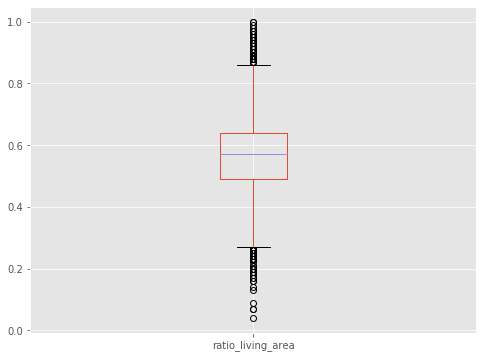

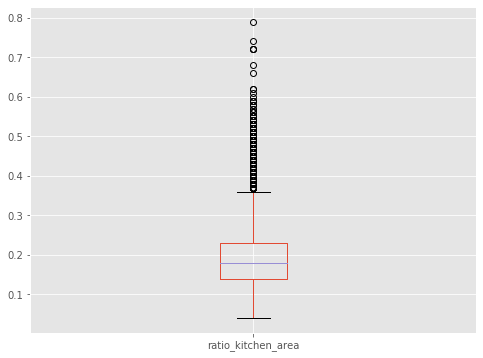

In [39]:
#посмотрим диаграмму размаха по каждому столбцу после нормализации
for column in df_normalize:
    try:
        plt.rcParams['figure.figsize']=(8,6)
        plt.figure()
        df_normalize.boxplot([column])
    except:
        print()

In [40]:
print(df_normalize.shape)

(21338, 29)


Были удалены выбросы из столбцов с информацией о цене и общей площади недвижимости.

## Зависимость цены от площади, числа комнат, удалённости от центра. <a id='12'></a>

Изучим зависимость цены от площади, числа комнат, удалённости от центра.

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.694052,0.431782,-0.344634
total_area,0.694052,1.000000,0.803538,-0.121860
rooms,0.431782,0.803538,1.000000,-0.069599
cityCenters_nearest,-0.344634,-0.121860,-0.069599,1.000000


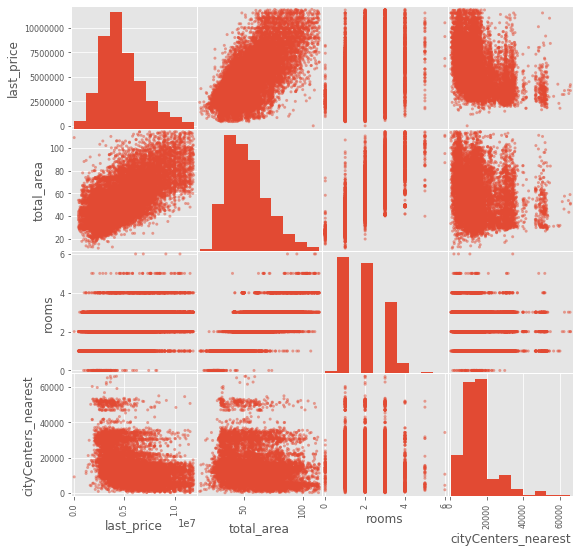

In [41]:
#соберем датафрейм для определения зависимости цены от площади, числа комнат и удаленности от центра.
df_price = df_normalize[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]

df_price.corr()
pd.plotting.scatter_matrix(df_price,figsize=(9,9))

df_price.corr(method='pearson')

На графике выше можно заметить сильную положительную корреляцию цены и площади, которая ослабевает, когда площадь квартиры слишком большая. Это вполне логично, поскольку с увеличением площади квартиры цена также в большинстве случаев должна увеличиваться.

Далее есть слабая положительная корреляция цена и числа комнат. Во многих объявлениях с увеличением числа комнат, цена увеличивается.

А вот корреляция с расстоянием до центра слабая отрицательная и это тоже вполне логично, ведь чем дальше квартира от центра города, тем вероятнее, что цена будет ниже.

## Влияние на цену квартиры номера этажа и даты размещения объявления <a id='13'></a>

Теперь посмотрим, как на стоимость квартиры влияет номер этажа и дата размещения объявления (день, месяц, год).

In [42]:
#соберем датафрейм для определения зависимости цены от номера этажа и даты размещения (день, месяц, год)
df_price2 = df_normalize[['last_price', 'floor_type', 'weekday', 'month', 'year']]

# посмотрим на таблицу корреляций
df_price2.corr()

,last_price,weekday,month,year
last_price,1.000000,-0.015436,0.006218,0.005904
weekday,-0.015436,1.000000,0.011460,-0.001970
month,0.006218,0.011460,1.000000,-0.268664
year,0.005904,-0.001970,-0.268664,1.000000


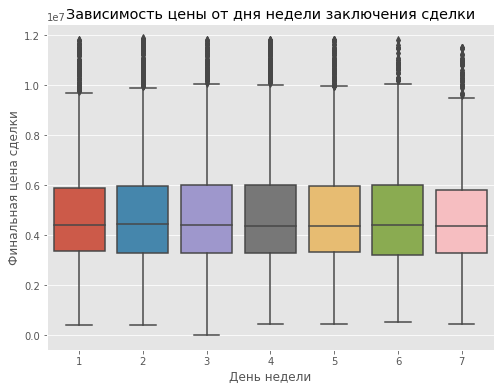

In [43]:
#зависимость цены от дня недели, в который было подано объявление
sns.boxplot(x='weekday',y='last_price', data=df_price2) \
        .set(title = 'Зависимость цены от дня недели заключения сделки', \
             xlabel = 'День недели', ylabel = 'Финальная цена сделки' )
plt.show()

Зависимость цены от дня недели совершения сделки отсутствует. Можно лишь отметить, что в воскресенье размах цен ниже.

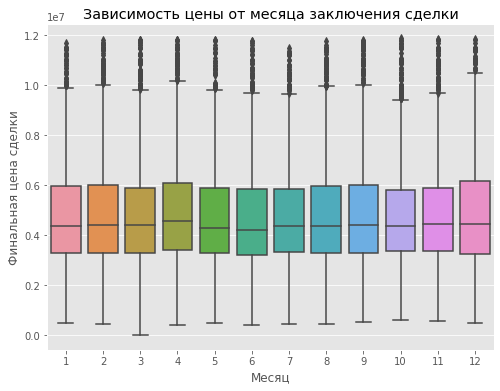

In [44]:
#зависимость цены от дня месяца подачи объявления
sns.boxplot(x='month',y='last_price', data=df_price2) \
            .set(title = 'Зависимость цены от месяца заключения сделки', \
             xlabel = 'Месяц', ylabel = 'Финальная цена сделки' )
plt.show()

Выгоднее всего можно приобрести недвижимость в июне - наиболее низкая медиана и нижняя граница цены. В этот месяцы многие люди заканчивают учебу, выходят в отпуск или просто на лето куда-нибудь уезжают - спрос на квартиры  ниже.

Также на графике видно два всплеска верхних границ цен на недвижимость - апрель и сентябрь. Сентябрь связан с началом делового сезона, когда люди приезжают и переезжают в другие города, чтобы работать и учиться. 

Наиболее широкий размах - в декабре. Это может быть связано с опасениями людей относительно посленовогоднего повышения цен и желанием встречать Новый Год в квартире (особенно если это планировалось, но откладывалось по каким-то причинам). Тут могут срабатывать психологические факторы и люди с большей готовностью покупают дорогую недвижимость или продавать по менее низкой стоимости.

В целом, колебания цен на недвижимость в зависимости от месяца продажи слабые.

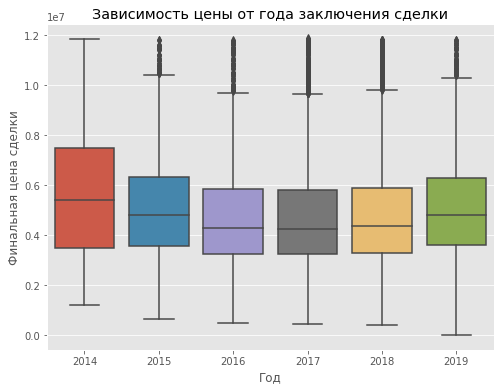

In [45]:
#зависимость цены от года подачи объявления
sns.boxplot(x='year',y='last_price', data=df_price2)\
            .set(title = 'Зависимость цены от года заключения сделки', \
             xlabel = 'Год', ylabel = 'Финальная цена сделки')
plt.show()

На графике четко видно влияние политического кризиса 2014 года, когда доллар и евро выросли в цене, а рубль звонко упал на пол. Люди запаниковали, что цены на недвижимость вырастут и раскупали все подряд. Увеличение спроса, закономерно, вызвало увеличение стоимости.

Падение цен на недвижимость в 2015 году, насколько мне известно, было вызвано увеличением числа новых застроек, а значит и выросло предложение. Спрос при этом вероятно остался на прежнем уровне, хотя по графику можно предположить, что спрос упал (либо люди купили, что хотели, либо у них закончились свободные деньги).

В 2018 году упало число застройщиков нового жилья и упала ставка по ипотеке (особенно на покупку новостроек), что вызвало спрос на недвижимость - соответственно вызвало и рост цен.

В целом, на динамику ценообразования недвижимости влияет много факторов. Так, например, можно предположить, что текущее снижение ставки по ипотеке скорее всего вызовет повышение цен на новостройки к концу 2020 года. Однако закон, освобождающий застройщиков от уплаты неустойки до 1 января 2021 года (а скорее всего и дольше), может снизить желание людей покупать новостройки, плавно переходящие в долгострои.

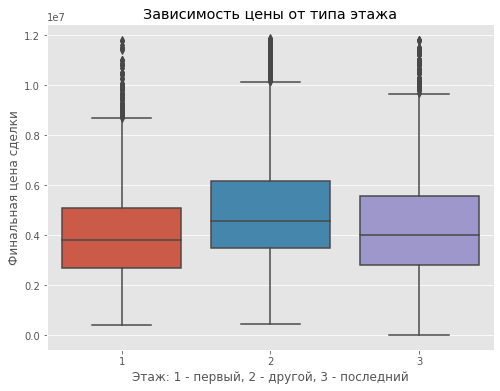

In [46]:
#соберем отдельный датафрейм с данными о цене и типе этажа
df_price3 = df_normalize[['last_price', 'floor_type']]

#посмотрим как выглядит распределение цены в зависимости от типа этажа
#1 - первый, 2 - другой, 3 - последний
sns.boxplot(x='floor_type', y='last_price', data=df_price3)\
         .set(title = 'Зависимость цены от типа этажа', \
        xlabel = 'Этаж: 1 - первый, 2 - другой, 3 - последний', ylabel = 'Финальная цена сделки')
plt.show()


Из таблицы и графика видно, что наиболее высокая цена у квартир, расположенных между первым и последним этажом. Это можно попробовать объяснить бытовыми факторами проживания: 
- крыша не протекает / крышу не уносит (в Россиии всякое бывает)
- напор воды/газа с повышением этажности может снижаться
- стук в окна посреди ночи возможен, но маловероятен
- меньше шанс квартирной кражи через окно или крышу
- при неработающем лифте не нужно будет идти до 25 этажа пешком
- последствия засорения канализации также чаще всего разурливают жители первого этажа
- не слышно хлопанье входной двери подъезда и шум лифта


При этом цена квартиры на последнем этаже все-таки выше цены квартиры на первом этаже.

In [47]:
#соберем датафрейм, чтобы посмотреть цену за квадратный метр в населенных пукнтах с большим числом объявлений
df_price4 = df_normalize[['locality_name', 'price_per_square_meter']]
df_price5 = df_price4.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['mean', 'count'])
df_price5.columns = ['mean', 'count']
df_price5.sort_values(by=['count'], ascending=False, inplace=True)

#посмотрим 10 населенных пунктов с самой высокой средней ценой за квадратный метр    
display(df_price5.head(10))

,mean,count
locality_name,,
Санкт-Петербург,105686.252553,13546
поселок Мурино,85629.568641,552
поселок Шушары,78578.068303,436
Всеволожск,67222.431447,394
Пушкин,100462.063512,336
Колпино,75221.876299,335
поселок Парголово,90332.262638,326
Гатчина,68664.035611,303
деревня Кудрово,92409.726309,298


Таким образом, наиболее высокая средняя цена за квадратный метр в Санкт-Петербурге, самая низкая - в Выборге.

## Анализ сегмента квартир в центре Санкт-Петербурга <a id='14'></a>


Далее определим, какая зона (км) является центральной в городе Санкт-Петербурге.

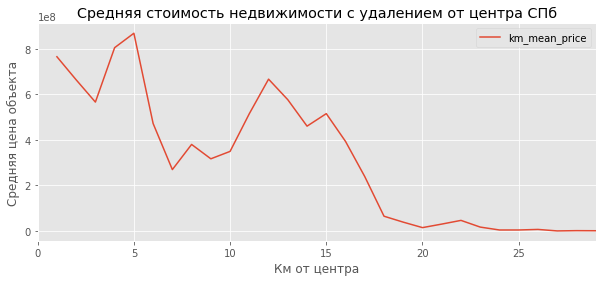

In [48]:
#сделаем срез данных по городу Санкт_Петербургу
df_price6 = df_normalize.query('locality_name == "Санкт-Петербург"')
#добавим столбец с километрами до центра
df_price6['km_cityCenters'] = round((df_price6['cityCenters_nearest'] / 1000),0)

#группируем данные по километрам
df_price7 = df_price6.groupby('km_cityCenters')['last_price'].sum().reset_index()

#display(df_price7)

#добавим столбец со средней ценой для каждого километра
df_price7['km_mean_price'] = round((df_price7['last_price'] / df_price7['km_cityCenters']),0)


df_price7.plot(kind='line',x='km_cityCenters',y='km_mean_price',\
                title='Средняя стоимость недвижимости с удалением от центра СПб',figsize=(10,4))\
                .set(xlabel='Км от центра',
                ylabel='Средняя цена объекта')
plt.show()

На графике видно,чторезкий спад цен происходит в районе 7 км удаления от центра - это расстояние будет считаться радиусом центра Санкт-Петербурга.

In [49]:
center_spb = df_price6.query('km_cityCenters <= 7')
center_spb_median = center_spb.pivot_table(index='locality_name', values=['total_area','last_price','rooms','ceiling_height'], aggfunc='median')

print(center_spb_median)


                 ceiling_height  last_price  rooms  total_area
locality_name                                                 
Санкт-Петербург             3.0     7203654      2        63.3


Наиболее типичным объектом недвижимости в центре Санкт-Петербурга является двухкомнатная квартира с площадью около 63 квадратных метров, высотой потолка примерно 3 метра и ценой в районе 7.2 миллионов.

,last_price,total_area,rooms
last_price,1.000000,0.696327,0.448408
total_area,0.696327,1.000000,0.792095
rooms,0.448408,0.792095,1.000000


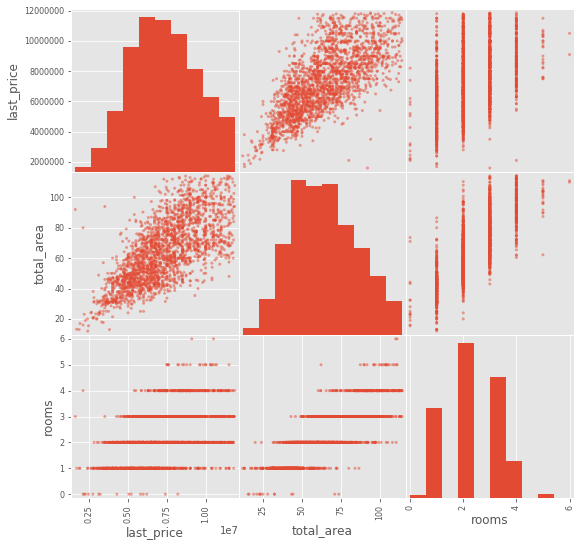

In [50]:
#соберем датафрейм для определения зависимости цены от площади, числа комнат 
center_spb1 = center_spb[['last_price', 'total_area', 'rooms']]

center_spb1.corr()
pd.plotting.scatter_matrix(center_spb1,figsize=(9,9))

center_spb1.corr(method='pearson')

В центре Санкт-Петербурга цена наибольшую положительную корреляцию имеет с общей площадью квартиры. Все как и по области - чем выше площадь или число комнат в квартире, тем вероятнее повышение стоимости.

last_price


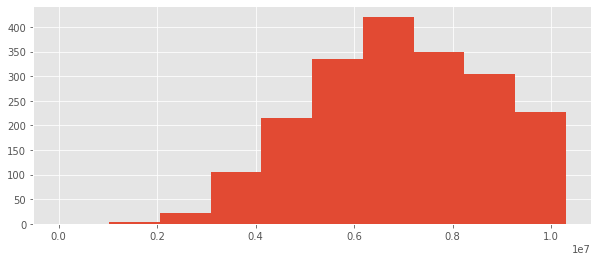

total_area


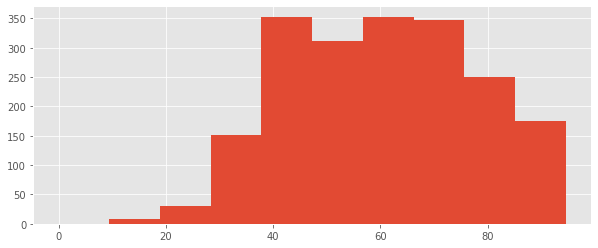

price_per_square_meter


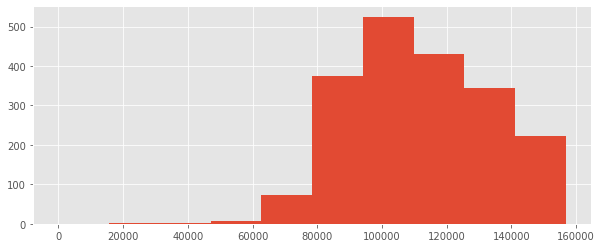

rooms


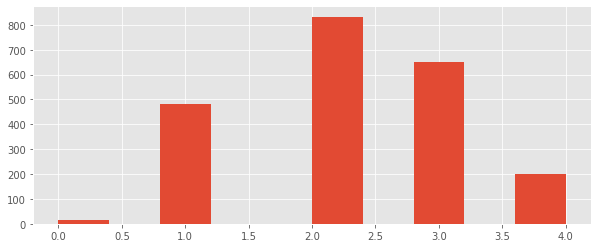

ceiling_height


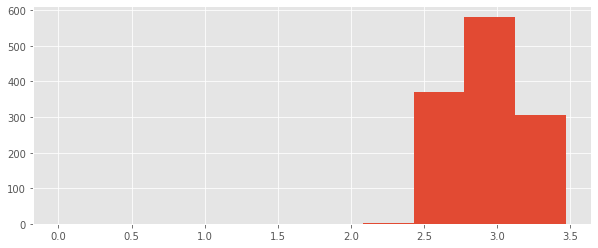

In [51]:
#создадим отдельный датафрейм из столбцов, для которых необходимо построить гистограмму
center_spb2 = center_spb[['last_price','total_area', 'price_per_square_meter','rooms', 'ceiling_height']]

#построим гистограммы
for element in center_spb2.columns.values:
    center_spb2[element].hist(bins=10, range=(0,center_spb2[element].quantile(0.9)),figsize=(10,4))
    print(center_spb2[element].name)
    plt.show()

Наиболее часто в центре Санкт-Петербурга встречается недвижимость с площадью 40-70 квадратных метров, стоимостью примерно 100к рублей за квадратный метр, двумя комнатами и высотой полотка 3 метра.

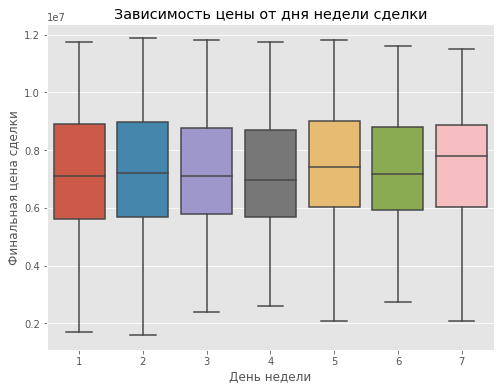

,last_price,weekday,month,year
last_price,1.000000,0.030456,-0.024920,-0.000036
weekday,0.030456,1.000000,0.033180,0.010781
month,-0.024920,0.033180,1.000000,-0.234319
year,-0.000036,0.010781,-0.234319,1.000000


In [52]:
#соберем датафрейм для определения зависимости цены от номера этажа и даты размещения (день, месяц, год)
center_spb2 = center_spb[['last_price', 'floor_type', 'weekday', 'month', 'year']]

#зависимость цены от дня недели, в который было подано объявление
sns.boxplot(x='weekday',y='last_price', data=center_spb2)\
         .set(title = 'Зависимость цены от дня недели сделки', \
        xlabel = 'День недели', ylabel = 'Финальная цена сделки')
plt.show()


center_spb2.corr()

Касаемо медианного значения цены на недвижимость в зависимости от дня недели, можно отметить,что в центре Санкт-Петербурга при заключении сделки в пятницу или воскресенье цена вероятнее всего будет незначительно выше.

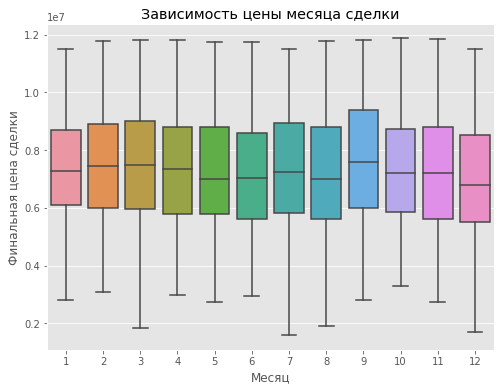

In [53]:
#зависимость цены от месяца, в который было подано объявление
sns.boxplot(x='month',y='last_price', data=center_spb2)\
         .set(title = 'Зависимость цены месяца сделки', \
        xlabel = 'Месяц', ylabel = 'Финальная цена сделки')
plt.show()



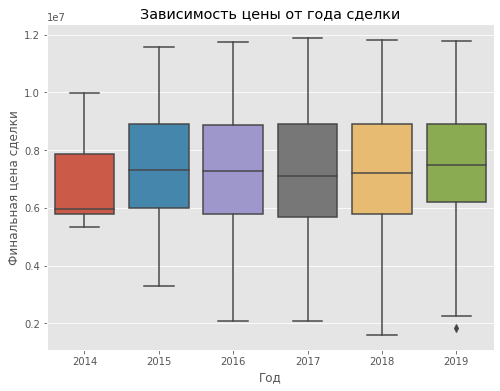

In [54]:
#зависимость цены от года, в который было подано объявление
sns.boxplot(x='year',y='last_price', data=center_spb2)\
         .set(title = 'Зависимость цены от года сделки', \
        xlabel = 'Год', ylabel = 'Финальная цена сделки')
plt.show()


На фоне политического кризиса 2014 года цены на недвижимость в центре Санкт-Петербурга были ниже, чем в последующие годы. Сложно сказать, упали цены или остались на прежнем уровне, поскольку данных за предыдущие годы нет. Возможно, это связано со снижением спроса на дорогостоящее жилье. В последующие годы цена на недвижимость поднялась и тенденция примерно соответствует областной.

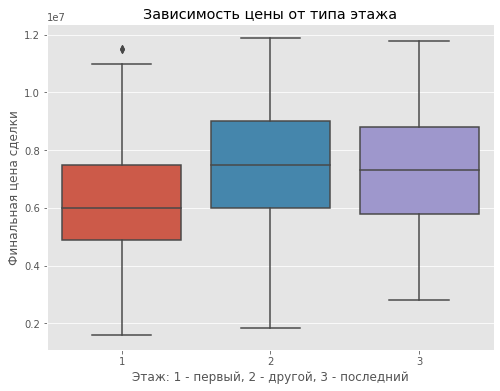

In [55]:
#соберем отдельный датафрейм с данными о цене и типе этажа
center_spb3 = center_spb[['last_price', 'floor_type']]

#посмотрим как выглядит распределение цены в зависимости от типа этажа
#1 - первый, 2 - другой, 3 - последний
sns.boxplot(x='floor_type', y='last_price', data=center_spb3)\
         .set(title = 'Зависимость цены от типа этажа', \
        xlabel = 'Этаж: 1 - первый, 2 - другой, 3 - последний', ylabel = 'Финальная цена сделки')
plt.show()

Тенденция с ценами в зависимости от этажа квартиры в центре Санкт-Петербурга совпадает с тенденцией по области. Самый дешевые квартиры - на первом этаже, самые дорогие - между первым и последним.

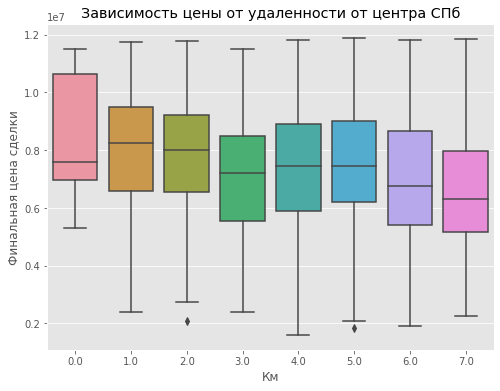

In [56]:
#посмотрим как выглядит распределение цены с удалением от центра СПб
sns.boxplot(x='km_cityCenters', y='last_price', data=center_spb)\
         .set(title = 'Зависимость цены от удаленности от центра СПб', \
        xlabel = 'Км', ylabel = 'Финальная цена сделки')
plt.show()

На графике видно, что чем ближе недвижимость расположена к центру Санкт-Петербурга, тем выше будет ее стоимость. Отдельно стоит отметить недвижимость, расположенную в самом центре - низкая медианная стоимость и большой положительный сдвиг распределения цен. Низкая медиана может быть вызвана тем, что центр города ранее составляли доходные дома, ныне переделанные в коммунальные квартиры - возможно люди продают отдельные комнаты, цена которых не очень высокая. С другой стороны наверняка в центре города есть элитное жилье, которое продается дорого (например, те же коммуналки, которые удалось превратить в единое жилье).

Таким образом, для стоимости недвижимости в центре Санкт-Петербурга можно отметить:
 1. Наиболее характерной является недвижимость с площадью 40-70 квадратных метров, стоимостью примерно 100к рублей за квадратный метр, двумя комнатами и высотой полотка 3 метра.
 2. В отличие от всей области, где нет различий в цене в зависимости от дня заключения сделки, в центре Санкт-Петербурга при заключении сделки в пятницу или воскресенье появляется шанс купить/продать недвижимость по более высокой цене.
 3. Тенденция к более высокой стоимости недвижимости, расположенной не на первом или последнем этаже, сохраняется.
 4. В 2014 году было падение цен на квартиры в центре Санкт-Петербурга. В последующие годы цены поднялись.
 5. В самом центре города можно купить относительно дешевую недвижимость (комнату в коммуналке, например), в остальном с удалением от центра города цена на квартиры снижается.

# Общий вывод и рекомендации <a id='15'></a>

В целом, по результатам исследования можно отметить следующие параметры, влияющие на рыночную стоимость недвижимости:
1. Площадь квартиры. С увеличением площади недвижимости, цена возрастает.
2. Число комнат. С увеличением числа комнат в квартире, цена возрастает.
3. Квартиры, расположенные ближе к центру города, имеют более высокую стоимость. Обясняется близостью всех инфраструктур, которые в российских городах имеют свойство исчезать ближе к окраинам.
4. Недвижимость, проданная в июне имеет более низкую стоимость. Вероятно связано с сезонами отпусков и низким спросом. Сделки с высокой стоимостью заключаются чаще всего в апреле и сентябре
5. Недвижимость, выставленная на продажу в конце рабочей недели, в большей вероятностью будет продана дешевле.
6. На стоимость жилья влияет также год продажи - так, если в мире случается какой-то кризис, касающийся изменения курса валют или вообще свободного движения капитала, то скорее всего цена на недвижимость будет меняться.
7. Касательно выбора этажа, то относительно остальных дешевыми квартиры, расположенные на первом этаже.Самыми дорогими - расположенные между первым и последним этажом.

При уменьшении территории с Ленинградской области до центра Санкт-Петербурга тенденции влияния разных параметров на стоимость недвижимости по большей части сохраняются. Стоит отметить, что в 2014 году цены на квартиры в центре Санкт-Петербурга были значительно ниже, чем в последующие годы. Пиком заключения дорогих сделок является сентябрь (в этот месяц шанс продать свою недвижимость дороже повышается).